In [63]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV,KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
hr=pd.read_csv('HR_comma_sep.csv')
dum_hr = pd.get_dummies(hr,drop_first=True)
X=dum_hr.drop('left',axis=1)
y=dum_hr['left']                

In [96]:
y.sum()

3567

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=14,stratify=y)

In [113]:
dtc=DecisionTreeClassifier(random_state=14,max_depth=4)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=14)

In [114]:
((2896/10496)*0.476)+((7600/10496)*0.173)

0.2566021341463415

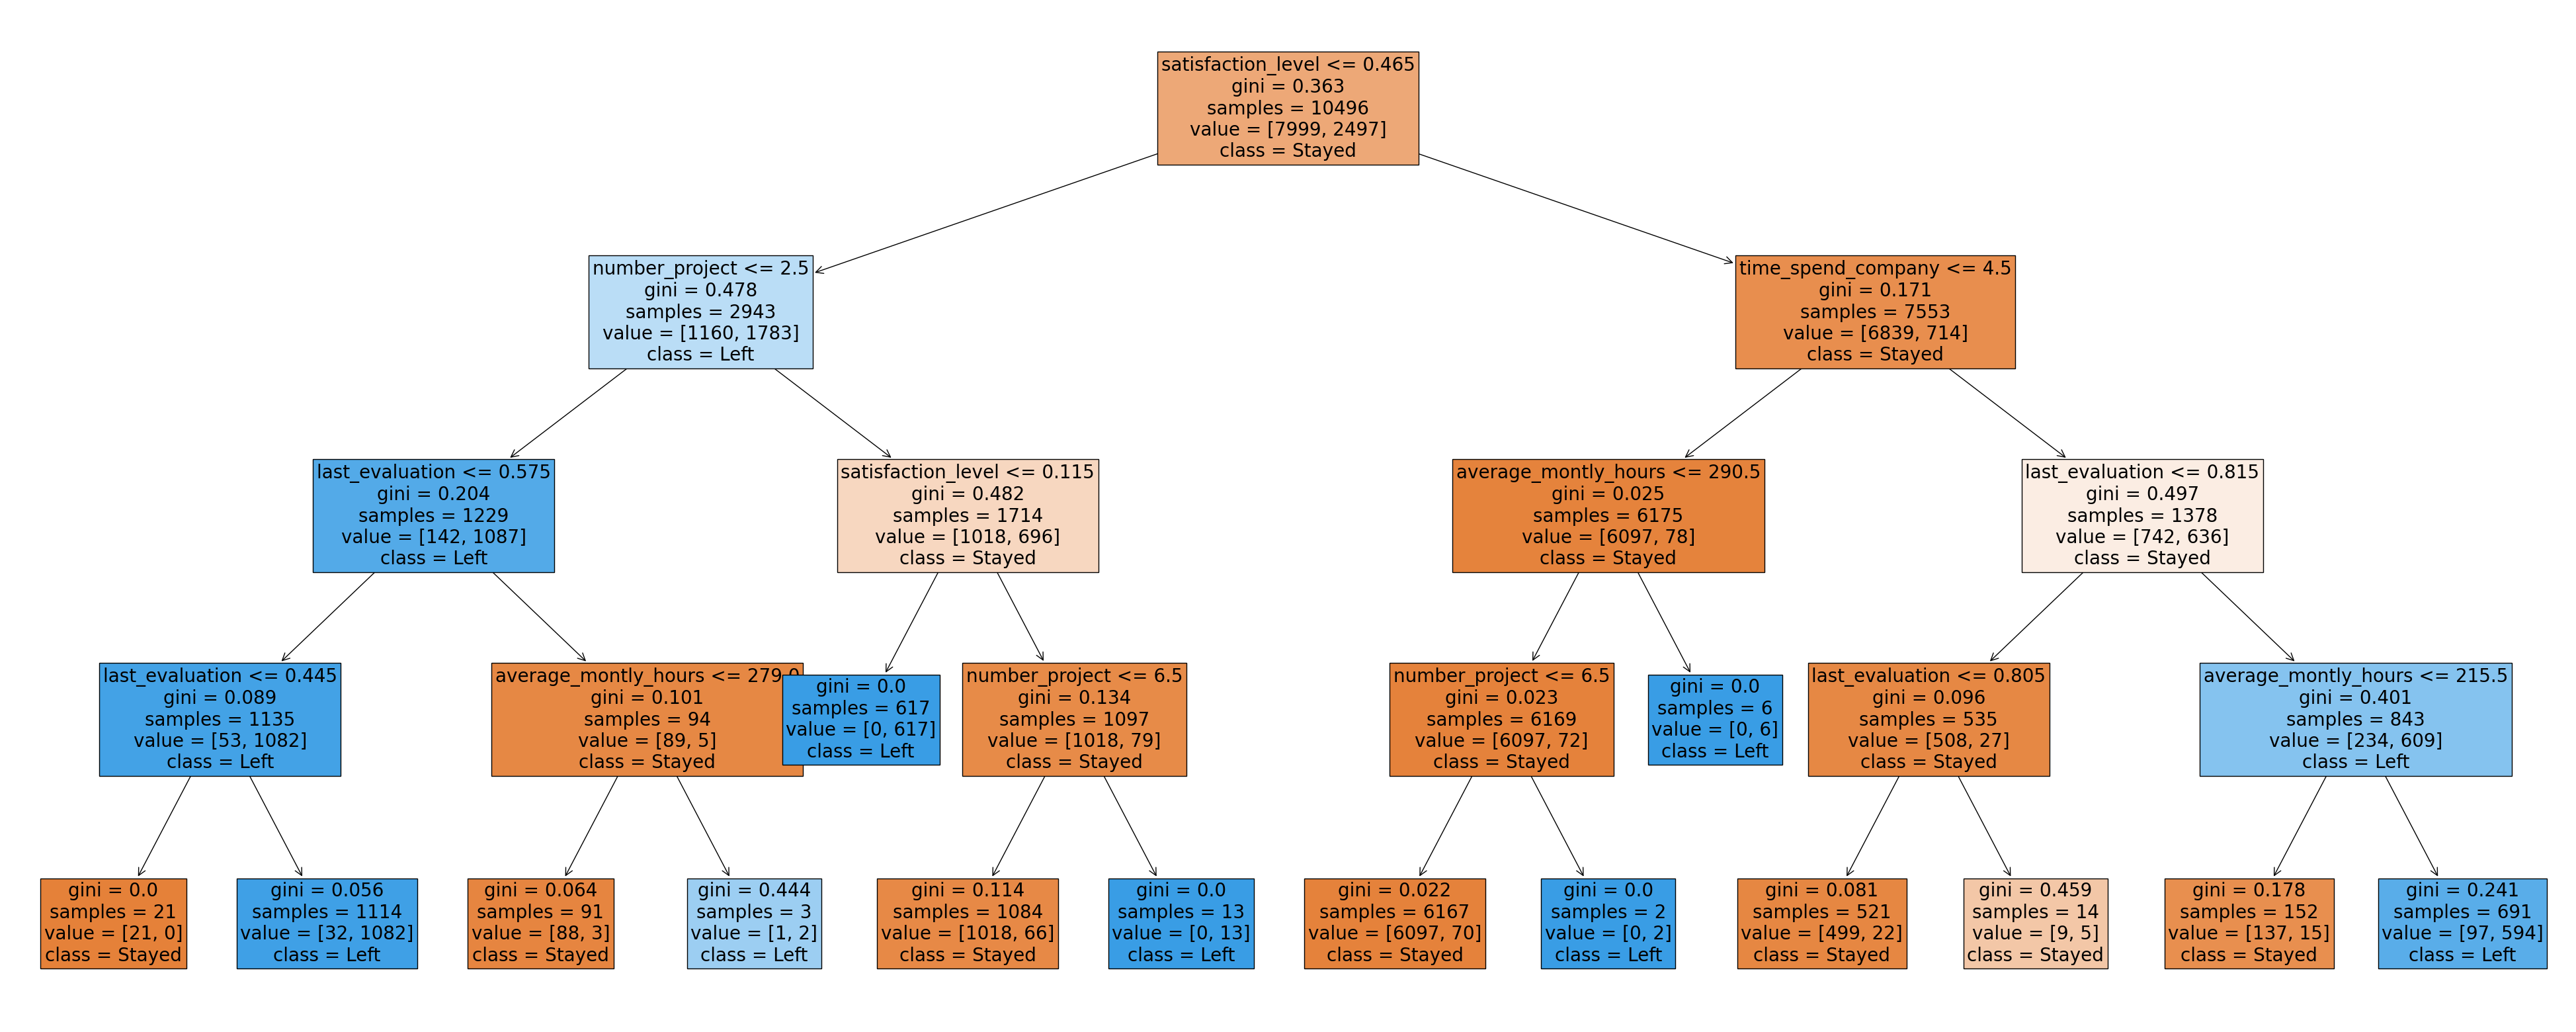

In [115]:
#Creating a graphical representation of Tree
plt.figure(figsize=(50,20))
plot_tree(dtc,feature_names=X_train.columns,class_names=['Stayed','Left'], filled=True,fontsize=20)
plt.show()

In [34]:
(((7999/10496)*(1-(7999/10496)))+((2497/10496)*(1-(2497/10496))))  #Gini Impurity for root node

0.3626073398170267

In [35]:
dtc.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

In [16]:
print(X_test.loc[3049])
X_test.loc[256]

satisfaction_level         0.54
last_evaluation            0.72
number_project                3
average_montly_hours        172
time_spend_company            2
Work_accident                 0
promotion_last_5years         0
Department_RandD           True
Department_accounting     False
Department_hr             False
Department_management     False
Department_marketing      False
Department_product_mng    False
Department_sales          False
Department_support        False
Department_technical      False
salary_low                 True
salary_medium             False
Name: 3049, dtype: object


satisfaction_level         0.46
last_evaluation            0.46
number_project                2
average_montly_hours        154
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
Department_RandD          False
Department_accounting      True
Department_hr             False
Department_management     False
Department_marketing      False
Department_product_mng    False
Department_sales          False
Department_support        False
Department_technical      False
salary_low                False
salary_medium              True
Name: 256, dtype: object

In [18]:
dtc.predict_proba(X_test)

array([[0.98597   , 0.01403   ],
       [0.12087027, 0.87912973],
       [0.98597   , 0.01403   ],
       ...,
       [0.98597   , 0.01403   ],
       [0.98597   , 0.01403   ],
       [0.54110079, 0.45889921]])

In [64]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[2,3,4,5,6,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5,7,10,15]}
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}
-0.10757957256759484


In [65]:
best_model=gcv.best_estimator_
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,satisfaction_level,0.531978
1,last_evaluation,0.144549
2,number_project,0.099690
3,average_montly_hours,0.070052
4,time_spend_company,0.153190
5,Work_accident,0.000000
6,promotion_last_5years,0.000000
7,Department_RandD,0.000000
8,Department_accounting,0.000000
9,Department_hr,0.000000


In [84]:
df_imp=df_imp[df_imp['importance']>0.0001]

In [85]:
df_imp=df_imp.sort_values(by='importance',ascending=False)

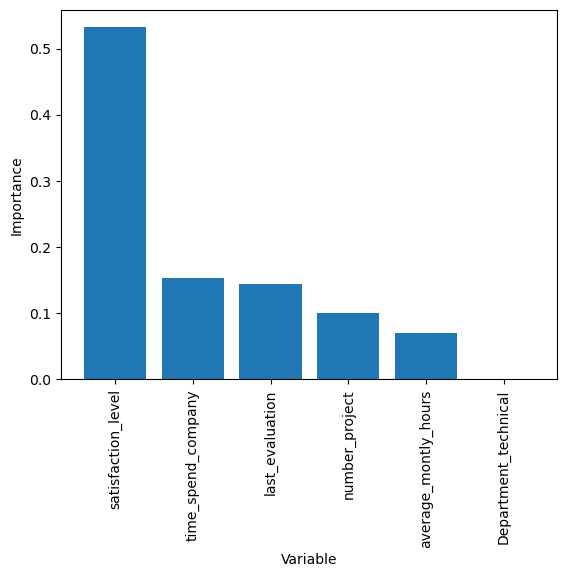

In [86]:
plt.bar(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.xlabel("Variable")
plt.xticks(rotation=90)
plt.show()

In [83]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}